## Dimensionality Reduction with Principal Component Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [10]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

In [13]:
explained_variance_ratio

array([0.36811419, 0.19518523, 0.10876777, 0.06544898, 0.06059828,
       0.05316228, 0.04271848, 0.0269763 , 0.02166262, 0.01957693,
       0.01785505, 0.01254843, 0.00738547])

In [14]:
# Extract top 2 principal components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [15]:
 explained_variance

array([0.36811419, 0.19518523])

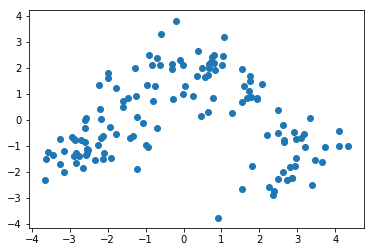

In [17]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=52)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=52, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 1, 13,  0],
       [ 0,  0, 16]], dtype=int64)

In [22]:
classifier.score(X_test, y_test)

0.9777777777777777

Text(0,0.5,'PC2')

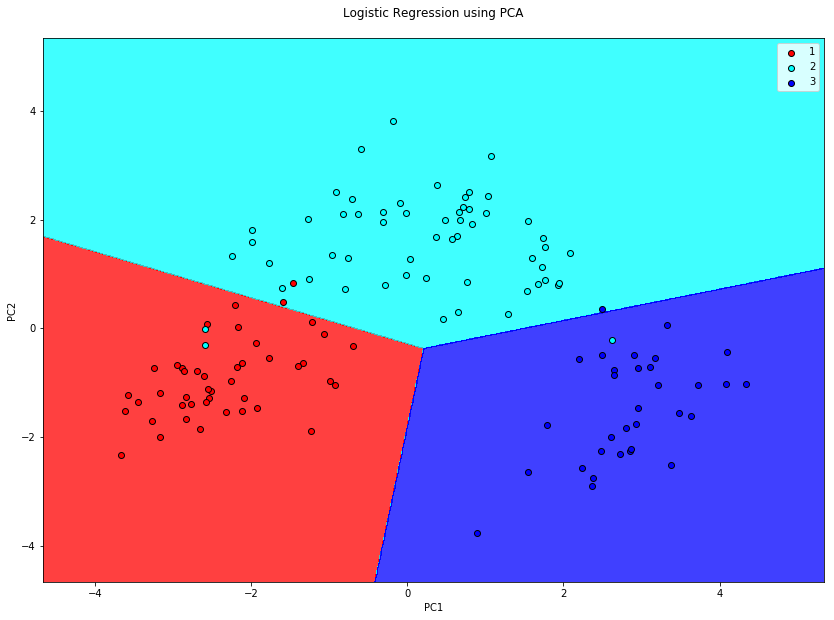

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(14, 10))

# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))

# classifies every pixel as 0 or 1
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'cyan', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'cyan', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using PCA\n')
plt.xlabel('PC1')
plt.ylabel('PC2')